# ML Identification of Phishing Websites

## Load Dataset


In [1]:
%autosave 60
%matplotlib inline

import os
import pandas as pd
import numpy as np

dataset_path = os.path.join('..', 'data', 'raw', 'phishing_websites.csv')
phishing_dataset = pd.read_csv(dataset_path)

phishing_dataset.head()

Autosaving every 60 seconds


,id,having_IP_Address,URL_Length,Shortening_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


## Dataset Characteristics

The data is encoded such that a particular feature for a given data point signifies whether the URL represented by that data point is legitimate (1), suspicious (0) or phishy (-1) with respect to the feature. 

### Target Classes

Categorical values for features: 1 = legitimate, 0 = suspicious, -1 = phishy.
Target classes: 1 = legitimate, -1 = phishy


## Data Exploration

In [2]:
phishing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
id                             11055 non-null int64
having_IP_Address              11055 non-null int64
URL_Length                     11055 non-null int64
Shortening_Service             11055 non-null int64
having_At_Symbol               11055 non-null int64
double_slash_redirecting       11055 non-null int64
Prefix_Suffix                  11055 non-null int64
having_Sub_Domain              11055 non-null int64
SSLfinal_State                 11055 non-null int64
Domain_registeration_length    11055 non-null int64
Favicon                        11055 non-null int64
port                           11055 non-null int64
HTTPS_token                    11055 non-null int64
Request_URL                    11055 non-null int64
URL_of_Anchor                  11055 non-null int64
Links_in_tags                  11055 non-null int64
SFH                            11055 non-null int64
Submitt

In [3]:
phishing_df = pd.DataFrame(phishing_dataset)
num_phishy = len(phishing_df[phishing_df['Result'] == -1])
num_legitimate = len(phishing_df[phishing_df['Result'] == 1])

print('\nNumber of phishy websites: {}'.format(num_phishy))
print('\nNumber of legitimate websites: {}'.format(num_legitimate))


Number of phishy websites: 4898

Number of legitimate websites: 6157


## Shuffle and Split Data

In [4]:
from sklearn.model_selection import train_test_split

phishing_classifications = phishing_df['Result']
phishing_features = phishing_df.drop('Result', axis=1)

X_train, X_test, y_train, y_test = train_test_split(phishing_features,
                                                   phishing_classifications,
                                                   test_size=0.2,
                                                   random_state=0)

print('Training set has {} samples.'.format(X_train.shape[0]))
print('Testing set has {} samples.'.format(X_test.shape[0]))

Training set has 8844 samples.
Testing set has 2211 samples.


## Training and Predicting Pipeline

In [5]:
from time import time
from sklearn.metrics import accuracy_score, f1_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test):
    results = {}
    
    # fit the learner to the training data
    start = time()
    learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time()
    
    results['train_time'] = end - start
    
    # make predictions on the test set, and make predictions on the first 2000 training samples
    start = time()
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:2000])
    end = time()
    
    results['pred_time'] = end - start
    
    results['acc_train'] = accuracy_score(y_train[:2000], predictions_train)
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    results['f_train'] = accuracy_score(y_train[:2000], predictions_train)
    results['f_test'] = f1_score(y_test, predictions_test)
    
    print('{} trained on {} samples.'.format(learner.__class__.__name__, sample_size))
    
    return results

## Naive Predictor

In [6]:
baseline_accuracy = num_phishy / len(phishing_df) * 100
false_positives = num_legitimate
true_positives = num_phishy
false_negatives = 0
baseline_precision = true_positives / (true_positives + false_positives)
baseline_recall = true_positives / (true_positives + false_negatives)
baseline_f1_score = 2 * baseline_precision * baseline_recall / (baseline_precision + baseline_recall)

print("Naive predictor: [Accuracy: {:.4f}, precision: {:.4f}, recall: {:.4f}, \
f1_score: {:.4f}]".format(baseline_accuracy, baseline_precision, baseline_recall, baseline_f1_score))

Naive predictor: [Accuracy: 44.3057, precision: 0.4431, recall: 1.0000, f1_score: 0.6141]


## Initial Model Evaluation

/home/davidadamojr/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier trained on 88 samples.
RandomForestClassifier trained on 884 samples.
RandomForestClassifier trained on 8844 samples.
GradientBoostingClassifier trained on 88 samples.
GradientBoostingClassifier trained on 884 samples.
GradientBoostingClassifier trained on 8844 samples.


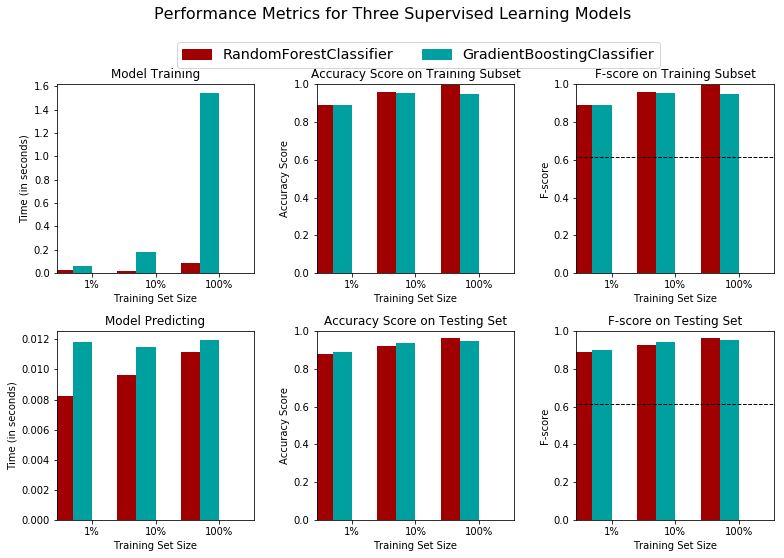

In [7]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

import visualize as vs

random_forest_clf = RandomForestClassifier(random_state=42)
gradient_boosting_clf = GradientBoostingClassifier(random_state=42)

one_percent_sample = int(len(X_train) * 0.01)
ten_percent_sample = int(len(X_train) * 0.1)
hundred_percent_sample = int(len(X_train))

results = {}
for classifier in [random_forest_clf, gradient_boosting_clf]:
    classifier_name = classifier.__class__.__name__
    results[classifier_name] = {}
    for i, samples in enumerate([one_percent_sample, ten_percent_sample, hundred_percent_sample]):
        results[classifier_name][i] = train_predict(classifier, samples, X_train, y_train, X_test, y_test)

vs.evaluate(results, baseline_accuracy, baseline_f1_score)

## Model Tuning: Random Forest Classifier

In [ ]:
import random
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score

random.seed(42)

rf_classifier = RandomForestClassifier(random_state=42)
n_estimators = [int(x) for x in np.linspace(100, 2000, 10)]
max_features = ['auto', 'sqrt', None]
max_depth = [int(x) for x in np.linspace(2, 100, 10)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

parameters = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'bootstrap': bootstrap
}
rf_scorer = make_scorer(f1_score)
grid_obj = RandomizedSearchCV(rf_classifier, parameters, n_iter=100, scoring=rf_scorer, cv=3, verbose=2, n_jobs=3)
grid_fit = grid_obj.fit(X_train, y_train)
best_rf_classifier = grid_fit.best_estimator_

unoptimized_predictions = (rf_classifier.fit(X_train, y_train)).predict(X_test)
optimized_predictions = best_rf_classifier.predict(X_test)

print('Unoptimized model')
print('-----------------')
print('Accuracy score on testing data: {:.4f}'.format(accuracy_score(y_test, unoptimized_predictions)))
print('f1 score on testing data: {:.4f}'.format(f1_score(y_test, unoptimized_predictions)))

print('\nOptimized model')
print('-----------------')
print('Accuracy score on testing data: {:.4f}'.format(accuracy_score(y_test, optimized_predictions)))
print('f1 score on testing data: {:.4f}'.format(f1_score(y_test, optimized_predictions)))


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:  3.1min


In [9]:
print(grid_fit.best_params_)

{'max_features': 'auto', 'n_estimators': 100}


## Model Tuning: Gradient Boosting Classifier

In [ ]:
from xgboost import XGBClassifier
gb_classifier = XGBClassifier(random_state=42)
parameters = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3, 1.0],
    'n_estimators': [200, 400, 600, 800, 1000],
    'max_depth': [2, 4, 8, 16, 32]
}
gb_scorer = make_scorer(f1_score)
gb_grid_obj = GridSearchCV(gb_classifier, parameters, scoring=gb_scorer, cv=3)
gb_grid_fit = gb_grid_obj.fit(X_train, y_train)
best_gb_classifier = gb_grid_fit.best_estimator_

gb_unoptimized_predictions = (gb_classifier.fit(X_train, y_train)).predict(X_test)
gb_optimized_predictions = best_gb_classifier.predict(X_test)

print('Unoptimized GB model')
print('---------------------')
print('Accuracy score on testing data: {:.4f}'.format(accuracy_score(y_test, gb_unoptimized_predictions)))
print('f1 score on testing data: {:.4f}'.format(f1_score(y_test, gb_unoptimized_predictions)))

print('\nOptimized GB model')
print('------------------')
print('Accuracy score on testing data: {:.4f}'.format(accuracy_score(y_test, gb_optimized_predictions)))
print('f1 score on testing data: {:.4f}'.format(f1_score(y_test, gb_optimized_predictions)))

In [80]:
print(gb_grid_fit.best_params_)

{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 33}
